# Logistic Regression

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_partregress

# Load the data
dat = pd.read_csv("Logistic.csv")

# Summary of the data
print(dat.describe())
dat.head()

         pregnant     glucose    pressure     triceps     insulin        mass  \
count  314.000000  314.000000  314.000000  314.000000  314.000000  314.000000   
mean     3.283439  121.605096   70.789809   28.703822  149.796178   32.990446   
std      3.238040   30.913619   12.276907   10.519335  117.054218    7.082898   
min      0.000000   68.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   98.000000   62.000000   21.000000   73.250000   28.400000   
50%      2.000000  117.000000   70.000000   28.500000  119.500000   32.900000   
75%      5.000000  142.750000   78.000000   35.000000  183.500000   36.875000   
max     17.000000  197.000000  110.000000   63.000000  846.000000   67.100000   

         pedigree         age  
count  314.000000  314.000000  
mean     0.523392   31.114650  
std      0.348460   10.544879  
min      0.085000   21.000000  
25%      0.267250   23.000000  
50%      0.452000   27.000000  
75%      0.681000   36.750000  
max      2.420

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,neg
1,0,137,40,35,168,43.1,2.288,33,pos
2,3,78,50,32,88,31.0,0.248,26,pos
3,2,197,70,45,543,30.5,0.158,53,pos
4,1,189,60,23,846,30.1,0.398,59,pos


In [3]:
#convert 'diabetes' column to binary
dat['diabetes'] = dat['diabetes'].apply(lambda x: 1 if x == 'pos' else 0)

dat.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


In [5]:

# Simple Logistic Regression
model_simple = smf.logit('diabetes ~ glucose', data=dat).fit()
print(model_simple.summary())


Optimization terminated successfully.
         Current function value: 0.486786
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  314
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            1
Date:                Wed, 31 Jul 2024   Pseudo R-squ.:                  0.2334
Time:                        15:34:32   Log-Likelihood:                -152.85
converged:                       True   LL-Null:                       -199.40
Covariance Type:            nonrobust   LLR p-value:                 4.974e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1588      0.700     -8.797      0.000      -7.531      -4.787
glucose        0.0433      0.

In [8]:

# Predicting probabilities for new data
newdata = pd.DataFrame({'glucose': [20, 180]})
print(newdata)
probabilities = model_simple.predict(newdata)
print(probabilities)
predicted_classes = ['pos' if x > 0.5 else 'neg' for x in probabilities]
print(predicted_classes)


   glucose
0       20
1      180
0    0.005000
1    0.836197
dtype: float64
['neg', 'pos']


In [9]:

# Multivariate Logistic Regression
model_multivariate = smf.logit('diabetes ~ glucose + mass + pregnant', data=dat).fit()
print(model_multivariate.summary())


Optimization terminated successfully.
         Current function value: 0.445675
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  314
Model:                          Logit   Df Residuals:                      310
Method:                           MLE   Df Model:                            3
Date:                Tue, 30 Jul 2024   Pseudo R-squ.:                  0.2982
Time:                        22:31:53   Log-Likelihood:                -139.94
converged:                       True   LL-Null:                       -199.40
Covariance Type:            nonrobust   LLR p-value:                 1.321e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3237      1.126     -8.280      0.000     -11.531      -7.117
glucose        0.0389      0.

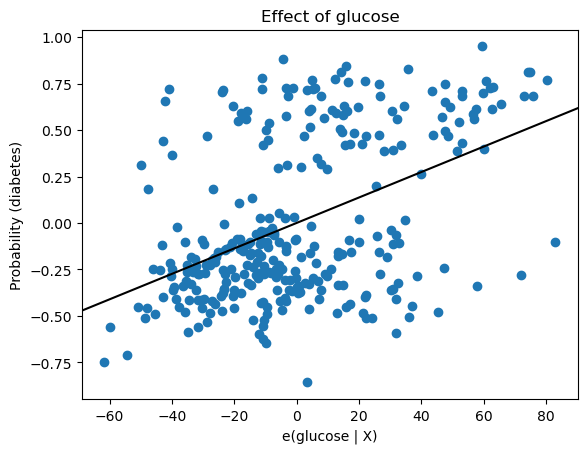

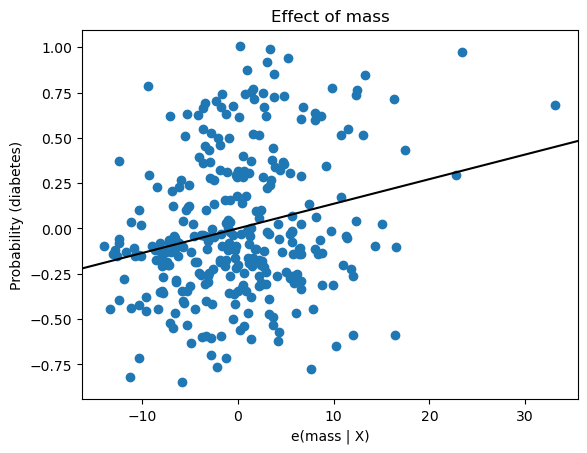

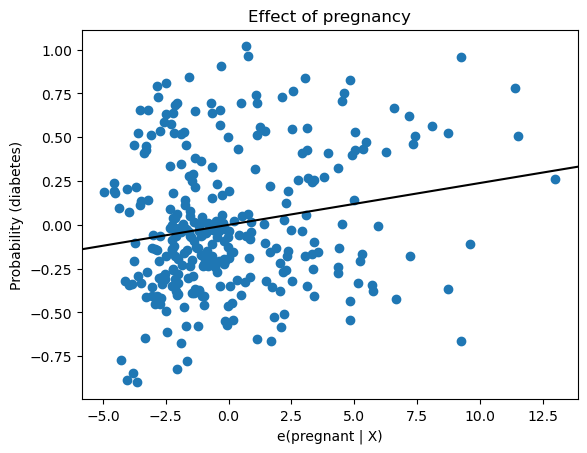

In [10]:

# Generate effect plots
# For glucose
fig, ax = plt.subplots()
plot_partregress('diabetes', 'glucose', ['mass', 'pregnant'], data=dat, ax=ax, 
                 obs_labels=False, ret_coords=False)
ax.set_ylabel('Probability (diabetes)')
ax.set_title('Effect of glucose')
plt.show()

# For mass
fig, ax = plt.subplots()
plot_partregress('diabetes', 'mass', ['glucose', 'pregnant'], data=dat, ax=ax, 
                 obs_labels=False, ret_coords=False)
ax.set_ylabel('Probability (diabetes)')
ax.set_title('Effect of mass')
plt.show()

# For pregnant
fig, ax = plt.subplots()
plot_partregress('diabetes', 'pregnant', ['glucose', 'mass'], data=dat, ax=ax, 
                 obs_labels=False, ret_coords=False)
ax.set_ylabel('Probability (diabetes)')
ax.set_title('Effect of pregnancy')
plt.show()
